## Is AP Half-Width a Distinguishing Feature of Excitatory and Inhibitory Cell Types?

## Cell Type Group 9
## Team Member Names & Contributions

- **Kyle Okamuro** (A13776497): worked on the writing and coding aspects of the project.
- **Bijou DeJong** (A13890147): worked on the coding and formatting of the Jupyter notebook.
- **Bryce Corley** (A14381746): worked on the writing aspects of the project and formatting of the Jupyter notebook. 

## Abstract

&emsp; Identifying intrinsic electrophysiological and morphological parameters to distinguish between excitatory and inhibitory neurons remains an unmet need. One recent study by Prestigio and colleagues has proposed that action potential (AP) half-width is the only parameter, related to the shape of a single AP, which allows for the differentiation of excitatory and inhibitory neurons. We calculated the z-score between excitatory and inhibitory neurons on the basis of AP half-width and a variety of other electrophysiological and morphological features from mouse cell data derived from the Allen Cell Types Database. Our results do not support Prestigio’s claim; rather, we found that average ISI, input resistance, number of nodes, total length, and total surface area are distinguishing electrophysiological and morphological features between these two cell types. 

## Research Question

Is AP half-width different between excitatory and inhibitory neuron populations, and are there any other electrophysiology or morphology features that we can use to distinguish between these populations? 

## Background and Prior Work

&emsp; Neurons serve a very important role within the nervous system, as the main method that information is processed and transmitted - whether motor or sensory information. Neurons may be classified in a variety of ways such as by their function, location, shape, and the transmitters they release. One method of classification that is of particular interest to our project is neurotransmitter release. In a broad sense, neurons may be classified as either excitatory or inhibitory, depending on the effect of the neurotransmitter. A balance between excitatory and inhibitory neuronal activity is important in a variety of cognitive processes, such as resting state and sensory processing [1].

&emsp; Identifying intrinsic cell parameters to distinguish between excitatory and inhibitory neurons remains difficult [2]. Specifically, there are limited electrophysiological parameters for discerning an excitatory neuron from an inhibitory neuron. One recent study by Prestigio and colleagues has proposed that AP half-width is the only parameter, related to the shape of a single AP, which allows for the differentiation of excitatory and inhibitory neurons [2]. They further advocate that passive electrophysiological properties, localization and axon initial segment, and the shape and frequency of the AP are all unreliable parameters for identifying a neuron as either excitatory or inhibitory [2]. 

&emsp; The primary goal of this study will be to assess the validity of their claim, using data derived from the Allen Cells Types Database. This is an open-access database that contains a survey of electrophysiological, morphological, transcriptomic features derived from single cell data, from both human neocortical and mouse primary visual cortex fluorescent cre-positive/negative cells. Electrophysiological and morphological data will be downloaded and accessed using separate methods of the CellTypesCache class and converted into Pandas data frames for manipulation.

&emsp; Since Prestigio used GAD67-GFP mice to generate their experimental results, we will focus our analysis on the mouse electrophysiology data within the Cell Types Database. This data is arranged in a matrix of 2333 mouse cell samples by row and 56 electrophysiological variables by column. Some electrophysiological features include average interspike interval, resting membrane potential, and upstroke downstroke ratio. These features were generated from whole-cell patch clamp recordings under a range of stimulus protocols [3]. However, testing Prestigio’s claim also requires the calculation of AP half-width. This is an action potential feature that does not exist in the Cell Types Database. We will use the Allen SDK Ephys Extractor Module to extract parameters from a single sweep of a cell, then use the parameters to calculate AP half-width. We will extract parameters of the sweep where current amplitude is equal to the rheobase. This is because Prestigio analyzed the first AP evoked during a minimal current injection [2], and the rheobase is minimal current which results in an action potential. 

&emsp;An additional goal of this study will be to identify distinguishing morphological features between excitatory and inhibitory cells. To do this, we will refer to the mouse morphology data found in the Cell Types Database. This data is arranged in a matrix of 671 mouse cell samples by row and 30 morphological variables by column. Some morphological features of the neuron include average diameter, average contraction, as well as total volume and length. These features and other morphology data not mentioned was generated from vitro slice preparations, biocytin-fills, and 3D digital reconstructions of the dendrites and axons of each neuron. [4]

&emsp; In identifying distinguishing morphological and electrophysiological differences in mouse neurons, we hope that the results will also translate to humans. Numerous studies have reinforced similarities between mouse and human neurons in a broad sense [5].

### References (include links):
[1] Zhou S and Yu Y. (2018). “Synaptic E-I Balance Underlies Efficient Neural Coding”. *Front. Neurosci.* 12:46. DOI: 10.3389/fnins.2018.00046.
https://www.frontiersin.org/articles/10.3389/fnins.2018.00046/full


[2] Prestigio et al. (2019). “Spike-Related Electrophysiological Identification of Cultured Hippocampal Excitatory and Inhibitory Neurons.”                                                                                                    Molecular Neurobiology, (2019) 56: 6276. DOI: 10.1007/s12035-019-1506-5
https://link.springer.com/article/10.1007/s12035-019-1506-5


[3] “Technical White Paper: Case Qualification and Donor Profiles”. (2018). Allen Cell Types Database, Allen Institute for Brain Science. 
http://help.brain-map.org/download/attachments/8323525/CellTypes_Case_Qualification_and_Donors.pdf 

[4] Gilbert TL. (2018) “The Allen Brain Atlas as a Resource for Teaching Undergraduate Neuroscience”. *J Undergrad Neurosci Educ*, 16(3):A261–A267. PMID: 30254541.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6153011/

 
[5] Kalmbach et al. (2018). “h-Channels Contribute to Divergent Intrinsic Membrane Properties of Supragranular Pyramidal Neurons in Human versus Mouse Cerebral Cortex.” *Neuron*, 100(5). DOI: 10.1016/j.neuron.2018.10.012. https://www.ncbi.nlm.nih.gov/pubmed/30392798

## Hypothesis


We hypothesize that the z-score of the difference of mean AP half-width between excitatory and inhibitory neurons will be greater than 1.96, indicating a statistical difference.

## Setup
Import and download the following packages and datasets in order to get started with the project!

In [1]:
#Import the "Cell Types Cache" from the AllenSDK core package.
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

#Initialize cache as 'ctc' (cell types cache).
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

#Import tool used to get AP spike data for specimen.
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

#Get rid of all the ugly red warnings.
import warnings
warnings.filterwarnings('ignore')

#Import Pandas and Numpy for manipulating and analyzing data.
import pandas as pd
import numpy as np

#Import Scipy and Matplot for statistics and plotting purposes.
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Prestigio, the paper we are primarily basing our project off of, used mouse data. So, filter the cells data to only get the mouse specimen.

In [2]:
mouse_cells_df = pd.DataFrame(ctc.get_cells(species = ['mus musculus']))
mouse_ids_df = mouse_cells_df[['id','dendrite_type']].set_index('id')
print('num specimen: ' + str(mouse_ids_df.shape[0]))
mouse_ids_df.head()

num specimen: 1920


,dendrite_type
id,
565871768,aspiny
469801138,aspiny
605889373,aspiny
485909730,spiny
323865917,spiny


Next, get the ID numbers of all mouse specimen with electrophysiology features. Include the rheobase sweep number for a later step.

In [3]:
ephys_features_df = pd.DataFrame(ctc.get_ephys_features())
ephys_ids_df = ephys_features_df[['specimen_id','rheobase_sweep_number']].set_index('specimen_id')
print('num specimen: ' + str(ephys_ids_df.shape[0]))
ephys_ids_df.head()

num specimen: 2333


,rheobase_sweep_number
specimen_id,
529878215,78
548459652,55
579978640,38
439024551,41
515188639,36


Use the inner join function to get specimen ID numbers of mice that have electrophysiology data.

Assuming that 'id' in the mouse cells dataframe is the same as 'specimen id' in the electrophysiology data, we can get the rheobase sweep number for each mouse specimen.

In [4]:
me_rheobase_df = mouse_ids_df.join(ephys_ids_df).reset_index()

# renaming the column here makes it easier to merge/join dataframes later
me_rheobase_df = me_rheobase_df.rename(columns={"id": "specimen_id"})

# this df has mouse ephys rheobase data
print('num specimen: ' + str(me_rheobase_df.shape[0]))
me_rheobase_df.head()

num specimen: 1920


,specimen_id,dendrite_type,rheobase_sweep_number
0,565871768,aspiny,40
1,469801138,aspiny,57
2,605889373,aspiny,53
3,485909730,spiny,33
4,323865917,spiny,34


Next, get the morphology dataset.

In [5]:
morph_feats_df = pd.DataFrame(ctc.get_morphology_features())
print('num specimen: ' + str(morph_feats_df.shape[0]))

num specimen: 671


Now we can use the morphology dataset to select for specimen that are mice, have electrophysiology data, and have morphology data by performing an inner merge of the two datasets. After performing the inner merge, get the id's from this merged dataset and make a morphology dataframe of those id's, as well as make an electrophysiology dataframe.

In [6]:
ephys_morph_mice_df = me_rheobase_df.merge(morph_feats_df,on='specimen_id', how='inner')

# this contains the ids of the mice with ephys and morph data
df_ids = ephys_morph_mice_df[['specimen_id']]

# make ephys df of only the mice with morphology and ephys data
ephys_df = ephys_features_df.merge(df_ids, on='specimen_id', how='inner')

# make morphology df of only the mice with morphology and ephys data
morph_df = morph_feats_df.merge(df_ids, on='specimen_id', how='inner')

Create a helper method to classify each specimen as inhibitory or excitatory by accessing their dendrite type in the `.get_cells()` method.

In [7]:
def classify(specimen_id):
    '''classifies a specimen as inhibitory or excitatory based on if its spiny or aspiny'''
    a_or_s = mouse_ids_df.loc[specimen_id]['dendrite_type']
    
    if a_or_s == 'spiny':
        return 'excitatory'
    else:
        return 'inhibitory'

Next, add a column to specify whether the neurons were inhibitory or excitatory to the electrophysiology and morphology data.

In [8]:
ephys_df['inhib/excit'] = ephys_df['specimen_id'].apply(classify)
ephys_df.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,inhib/excit
0,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,1.806510,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,excitatory
1,0.002303,8.756140,-33.787497,0.636671,1.729100,16.728967,1.023988,-60.968754,-63.145835,-66.856253,...,1.298640,-61.031254,-65.000005,-79.625003,0.987204,1.191762,1.294996,-85.593750,-79.520042,inhibitory
2,0.008008,42.867391,-111.638115,0.325524,1.101295,1.775697,1.025883,-67.406250,-66.593753,-67.802085,...,1.054124,-67.656250,-66.791669,-68.546875,2.350017,2.142121,2.262525,-100.187500,-66.241074,inhibitory
3,0.011140,44.374545,-28.642500,0.286192,1.060140,2.981870,1.025220,-47.531250,-48.437502,-51.054690,...,1.631545,-47.593754,-48.562502,-69.421877,3.782685,3.628545,4.015633,-99.187508,-68.897186,inhibitory
4,0.059450,238.470000,-11.630000,0.151066,1.095720,8.038240,1.025250,-49.406254,-48.479170,-57.390629,...,1.188280,-50.968750,-51.562501,-78.906254,2.320162,2.316604,2.936915,-95.500008,-83.018768,excitatory


In [9]:
morph_df['inhib/excit'] = morph_df['specimen_id'].apply(classify)
morph_df = morph_df.set_index('specimen_id')
print('num specimen: ' + str(morph_df.shape[0]))
morph_df.head()

num specimen: 519


,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume,inhib/excit
specimen_id,,,,,,,,,,,,,,,,,,,,,
478107198,82.727781,NaN,0.864267,0.345092,20.723077,0.964510,NaN,491119743,6.0,99.779724,...,0.1144,0.1144,0.28,435.740270,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086,inhibitory
502367941,82.506680,NaN,0.903890,0.634047,105.277778,0.862183,NaN,546781359,3.0,432.383110,...,0.1144,0.1144,0.28,1446.587725,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895,excitatory
515771244,77.536678,NaN,0.863104,0.417929,73.666667,0.926633,NaN,537042261,6.0,373.630444,...,0.1144,0.1144,0.28,287.118123,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423,excitatory
591268268,72.019250,NaN,0.873518,0.227626,47.535714,1.000000,NaN,657879305,5.0,186.218009,...,0.1144,0.1144,0.28,55.055236,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146,inhibitory
469753383,68.459909,NaN,0.889767,0.259649,28.263158,1.085194,NaN,491120305,6.0,107.897533,...,0.1144,0.1144,0.28,358.755159,False,3D Neuron Reconstruction morphology,1825.646321,1499.858295,108.114604,inhibitory


Next, get rid of all of the columns that are not quantitative, with the exception of the inhibitory/excitatory column.

In [10]:
#Drop columns that are not quantitative, with the exception of the inhib/excit columns
morph_df = morph_df.drop(columns=['superseded','tags','neuron_reconstruction_type'])

In [11]:
#Check for null values
morph_df.isnull().sum()

average_bifurcation_angle_local       0
average_bifurcation_angle_remote    519
average_contraction                   0
average_diameter                      0
average_fragmentation                 0
average_parent_daughter_ratio         0
hausdorff_dimension                 519
id                                    0
max_branch_order                      0
max_euclidean_distance                0
max_path_distance                     0
number_bifurcations                   0
number_branches                       0
number_nodes                          0
number_stems                          0
number_tips                           0
overall_depth                         0
overall_height                        0
overall_width                         0
scale_factor_x                        0
scale_factor_y                        0
scale_factor_z                        0
soma_surface                          0
total_length                          0
total_surface                         0


`morph_df` has nan for all of its values in 'hausdorff_dimension' and 'average_bifurcation_angle_remote', so get rid of those columns to simplify the code.

In [12]:
#Do not include columns in morph_df that are unrelated to morphology (ie. id numbers)
morph_columns = list(morph_df.columns)
morph_columns.remove('id')
morph_columns.remove('average_bifurcation_angle_remote')
morph_columns.remove('hausdorff_dimension')
morph_columns.remove('inhib/excit')
morph_columns

['average_bifurcation_angle_local',
 'average_contraction',
 'average_diameter',
 'average_fragmentation',
 'average_parent_daughter_ratio',
 'max_branch_order',
 'max_euclidean_distance',
 'max_path_distance',
 'number_bifurcations',
 'number_branches',
 'number_nodes',
 'number_stems',
 'number_tips',
 'overall_depth',
 'overall_height',
 'overall_width',
 'scale_factor_x',
 'scale_factor_y',
 'scale_factor_z',
 'soma_surface',
 'total_length',
 'total_surface',
 'total_volume']

In [13]:
inhib_morph_df = morph_df[morph_df['inhib/excit'] == 'inhibitory'].drop(columns = ['inhib/excit'])
excit_morph_df = morph_df[morph_df['inhib/excit'] == 'excitatory'].drop(columns = ['inhib/excit'])
print("inhib df shape:" + str(inhib_morph_df.shape))
print("excit df shape:" + str(excit_morph_df.shape))

inhib df shape:(279, 26)
excit df shape:(240, 26)


### AP Half Width Calculation
The next step of the code will be to calculate AP half width by accessing a specimen's rheobase sweep data through it's rheobase sweep number.

First, set the index in order to use the .loc method

In [14]:
#Setting the index here allows us to use the .loc method in helper function
rheobase_df = me_rheobase_df.set_index('specimen_id')
rheobase_df

,dendrite_type,rheobase_sweep_number
specimen_id,,
565871768,aspiny,40
469801138,aspiny,57
605889373,aspiny,53
485909730,spiny,33
323865917,spiny,34
...,...,...
512322162,spiny,44
488473535,aspiny,57
467003163,spiny,45


Next, use a helper function to calculate spike width.
In order to calculate the spike width, we used the the following code which comes from the following link: https://allensdk.readthedocs.io/en/latest/_static/examples/nb/cell_types.html#Computing-Electrophysiology-Features

In [15]:
def calc_spike_width(specimen_id):
    ''' calculates the spike width using specimen id to get the data. returns 0.0 if file does not exist'''
    try:
        data_set = ctc.get_ephys_data(specimen_id)
        sweep_number = rheobase_df.loc[specimen_id]['rheobase_sweep_number']
        sweep_data = data_set.get_sweep(sweep_number)

        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] # in A
        v = sweep_data["response"][0:index_range[1]+1] # in V
        i *= 1e12 # to pA
        v *= 1e3 # to mV

        sampling_rate = sweep_data["sampling_rate"] # in Hz
        t = np.arange(0, len(v)) * (1.0 / sampling_rate)

        sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
        sweep_ext.process_spikes()

        return round(1e3 * np.nanmean(sweep_ext.spike_feature("width")),4)
    
    except OSError as e:
        return -100

Calculating the AP half width for the whole dataframe at this point takes an excessively long time due to the method since some of the iterations require their own download. For this reason, it is recommended to take a sample of the first 30 specimen and calculate their spike widths (AP half widths).

In [16]:
ephys40 = ephys_df.head(30)

In [17]:
ephys40['spike_width'] = ephys40['specimen_id'].apply(calc_spike_width)
ephys40

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,inhib/excit,spike_width
0,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,excitatory,0.9183
1,0.002303,8.756140,-33.787497,0.636671,1.729100,16.728967,1.023988,-60.968754,-63.145835,-66.856253,...,-61.031254,-65.000005,-79.625003,0.987204,1.191762,1.294996,-85.593750,-79.520042,inhibitory,0.3753
2,0.008008,42.867391,-111.638115,0.325524,1.101295,1.775697,1.025883,-67.406250,-66.593753,-67.802085,...,-67.656250,-66.791669,-68.546875,2.350017,2.142121,2.262525,-100.187500,-66.241074,inhibitory,1.0400
3,0.011140,44.374545,-28.642500,0.286192,1.060140,2.981870,1.025220,-47.531250,-48.437502,-51.054690,...,-47.593754,-48.562502,-69.421877,3.782685,3.628545,4.015633,-99.187508,-68.897186,inhibitory,0.9100
4,0.059450,238.470000,-11.630000,0.151066,1.095720,8.038240,1.025250,-49.406254,-48.479170,-57.390629,...,-50.968750,-51.562501,-78.906254,2.320162,2.316604,2.936915,-95.500008,-83.018768,excitatory,0.8800
5,NaN,58.600000,-36.739996,0.095076,1.101680,11.133833,1.025875,-48.125004,-47.135418,-56.742191,...,-48.312504,-49.520835,-80.875006,2.121035,1.797871,2.397005,-93.906250,-80.402931,excitatory,0.9800
6,0.410374,24.886667,2.337500,0.053163,1.199040,11.020927,1.024433,-54.593754,-50.635418,-56.750004,...,-57.187500,-50.791668,-70.156255,1.783955,1.581153,1.861108,-100.375008,-69.816109,inhibitory,0.4800
7,0.176194,12.770000,-29.125001,0.828687,1.045960,9.596560,1.024035,-52.281254,-48.031252,-57.105471,...,-52.468754,-48.828127,-76.550787,1.566557,1.510595,1.713518,-89.937500,-76.392235,inhibitory,0.4000
8,0.054985,26.074167,-13.989375,0.035491,1.090215,3.391177,1.024271,-45.906254,-42.875003,-52.750002,...,-46.593750,-46.000003,-67.244795,2.347381,2.069299,2.389602,-94.218750,-66.155899,inhibitory,0.4625
9,0.046079,97.000000,23.797500,0.124640,1.156475,6.003742,1.025527,-42.000004,-42.354168,-46.335939,...,-52.562500,-53.708337,-72.765629,3.119665,3.083533,3.068449,-85.968758,-72.388512,excitatory,0.8217


Since our helper method returned '-100' every time the file required to calculate spike width was not found, we drop the rows with -100.

In [18]:
ephys40 = ephys40[ephys40['spike_width'] != -100]
ephys40

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,inhib/excit,spike_width
0,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,excitatory,0.9183
1,0.002303,8.756140,-33.787497,0.636671,1.729100,16.728967,1.023988,-60.968754,-63.145835,-66.856253,...,-61.031254,-65.000005,-79.625003,0.987204,1.191762,1.294996,-85.593750,-79.520042,inhibitory,0.3753
2,0.008008,42.867391,-111.638115,0.325524,1.101295,1.775697,1.025883,-67.406250,-66.593753,-67.802085,...,-67.656250,-66.791669,-68.546875,2.350017,2.142121,2.262525,-100.187500,-66.241074,inhibitory,1.0400
3,0.011140,44.374545,-28.642500,0.286192,1.060140,2.981870,1.025220,-47.531250,-48.437502,-51.054690,...,-47.593754,-48.562502,-69.421877,3.782685,3.628545,4.015633,-99.187508,-68.897186,inhibitory,0.9100
4,0.059450,238.470000,-11.630000,0.151066,1.095720,8.038240,1.025250,-49.406254,-48.479170,-57.390629,...,-50.968750,-51.562501,-78.906254,2.320162,2.316604,2.936915,-95.500008,-83.018768,excitatory,0.8800
5,NaN,58.600000,-36.739996,0.095076,1.101680,11.133833,1.025875,-48.125004,-47.135418,-56.742191,...,-48.312504,-49.520835,-80.875006,2.121035,1.797871,2.397005,-93.906250,-80.402931,excitatory,0.9800
6,0.410374,24.886667,2.337500,0.053163,1.199040,11.020927,1.024433,-54.593754,-50.635418,-56.750004,...,-57.187500,-50.791668,-70.156255,1.783955,1.581153,1.861108,-100.375008,-69.816109,inhibitory,0.4800
7,0.176194,12.770000,-29.125001,0.828687,1.045960,9.596560,1.024035,-52.281254,-48.031252,-57.105471,...,-52.468754,-48.828127,-76.550787,1.566557,1.510595,1.713518,-89.937500,-76.392235,inhibitory,0.4000
8,0.054985,26.074167,-13.989375,0.035491,1.090215,3.391177,1.024271,-45.906254,-42.875003,-52.750002,...,-46.593750,-46.000003,-67.244795,2.347381,2.069299,2.389602,-94.218750,-66.155899,inhibitory,0.4625
9,0.046079,97.000000,23.797500,0.124640,1.156475,6.003742,1.025527,-42.000004,-42.354168,-46.335939,...,-52.562500,-53.708337,-72.765629,3.119665,3.083533,3.068449,-85.968758,-72.388512,excitatory,0.8217


### Electrophysiology Data

After calculating AP Half Width, let's move on to cleaning and simplifying the electrophysiology data

In [19]:
#check to make sure there's no columns with all NaN values (like we saw in the morphology data)
ephys40.isnull().sum().sort_values(ascending=False)

slow_trough_v_short_square                10
slow_trough_t_short_square                10
slow_trough_t_long_square                  9
slow_trough_v_long_square                  9
slow_trough_t_ramp                         7
slow_trough_v_ramp                         7
adaptation                                 2
avg_isi                                    1
trough_v_short_square                      0
has_pause                                  0
rheobase_sweep_id                          0
peak_v_short_square                        0
peak_v_ramp                                0
peak_v_long_square                         0
peak_t_short_square                        0
peak_t_ramp                                0
peak_t_long_square                         0
latency                                    0
input_resistance_mohm                      0
id                                         0
has_delay                                  0
ri                                         0
has_burst 

Get rid of any columns with id numbers, in addition to removing any other non-numeric columns.

In [20]:
#This line of code checks the type of each value in each column:
ephys40.dtypes

adaptation                                float64
avg_isi                                   float64
electrode_0_pa                            float64
f_i_curve_slope                           float64
fast_trough_t_long_square                 float64
fast_trough_t_ramp                        float64
fast_trough_t_short_square                float64
fast_trough_v_long_square                 float64
fast_trough_v_ramp                        float64
fast_trough_v_short_square                float64
has_burst                                    bool
has_delay                                    bool
has_pause                                    bool
id                                          int64
input_resistance_mohm                     float64
latency                                   float64
peak_t_long_square                        float64
peak_t_ramp                               float64
peak_t_short_square                       float64
peak_v_long_square                        float64


In [21]:
ephys_columns = list(ephys40.columns)

#Now, let's get rid of all the features that involve the stimulus since 
#they are unrelated to the intrinsic properties of the neuron

cleaned_columns = []

for word in ephys_columns:
    if 'square' in word:
        print(word)
    elif 'ramp' in word:
        print(word)
    else:
        cleaned_columns.append(word)

#Next, create a list of columns to omit
invalids = ['has_burst','has_delay','has_pause','inhib/excit','id', 'rheobase_sweep_id','specimen_id',\
            'thumbnail_sweep_id']

for i in invalids:
    cleaned_columns.remove(i)
        
cleaned_columns

fast_trough_t_long_square
fast_trough_t_ramp
fast_trough_t_short_square
fast_trough_v_long_square
fast_trough_v_ramp
fast_trough_v_short_square
peak_t_long_square
peak_t_ramp
peak_t_short_square
peak_v_long_square
peak_v_ramp
peak_v_short_square
slow_trough_t_long_square
slow_trough_t_ramp
slow_trough_t_short_square
slow_trough_v_long_square
slow_trough_v_ramp
slow_trough_v_short_square
threshold_i_long_square
threshold_i_ramp
threshold_i_short_square
threshold_t_long_square
threshold_t_ramp
threshold_t_short_square
threshold_v_long_square
threshold_v_ramp
threshold_v_short_square
trough_t_long_square
trough_t_ramp
trough_t_short_square
trough_v_long_square
trough_v_ramp
trough_v_short_square
upstroke_downstroke_ratio_long_square
upstroke_downstroke_ratio_ramp
upstroke_downstroke_ratio_short_square


['adaptation',
 'avg_isi',
 'electrode_0_pa',
 'f_i_curve_slope',
 'input_resistance_mohm',
 'latency',
 'rheobase_sweep_number',
 'ri',
 'sag',
 'seal_gohm',
 'tau',
 'vm_for_sag',
 'vrest',
 'spike_width']

In [22]:
inhib_ephys_df = ephys40[ephys40['inhib/excit'] == 'inhibitory'].drop(columns = ['inhib/excit'])
excit_ephys_df = ephys40[ephys40['inhib/excit'] == 'excitatory'].drop(columns = ['inhib/excit'])

print("inhib df shape:" + str(inhib_ephys_df.shape))
print("excit df shape:" + str(excit_ephys_df.shape))

inhib df shape:(13, 57)
excit df shape:(17, 57)


## Data Analysis & Results

Our analysis and results will involve two plots from the electrophysiology data (one Z-score plot and one Boxplot) and one plot from the morphology data (one Z-score plot) which compares the excitatory and inhibitory neuron features.

### Electrophysiology

Since we subtract excitatory from inhibitory means, a positive zscore indicates that the excitatory mean value is higher than the inhibitory mean value.

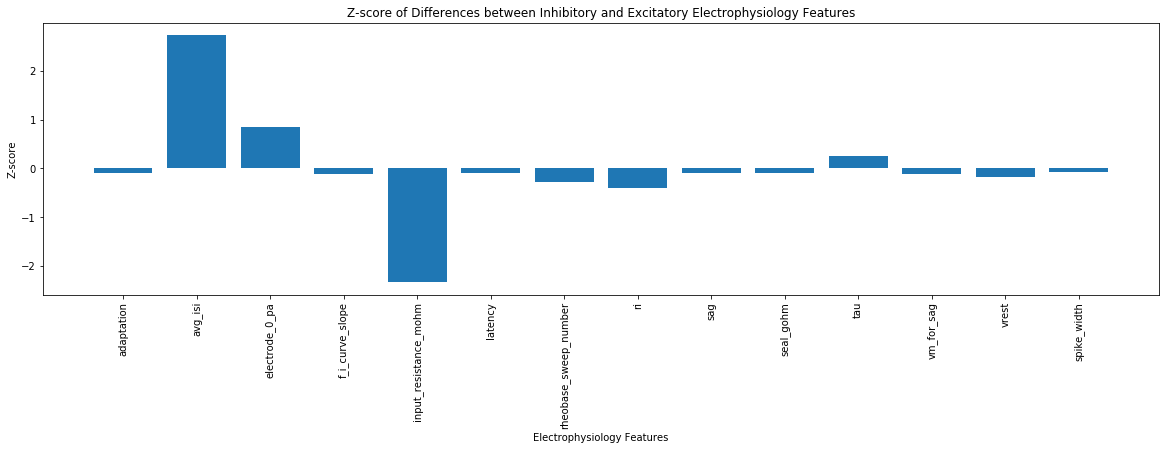

In [23]:
# Set up the figure
fig,ax = plt.subplots(figsize=(20,5))

differences = []

for i in cleaned_columns:
    inhib_mean = np.mean(inhib_ephys_df[i])
    excit_mean = np.mean(excit_ephys_df[i])
    differences.append(excit_mean - inhib_mean)

diff_zscore = stats.zscore(differences)
ax.bar(cleaned_columns, diff_zscore)
plt.xticks(rotation=90)

ax.set_xlabel('Electrophysiology Features')
ax.set_ylabel('Z-score')
ax.set_title("Z-score of Differences between Inhibitory and Excitatory Electrophysiology Features")

plt.show()

In [24]:
significant_indexes = []

for i in diff_zscore:
    if i >= 1.96:
        significant_indexes.append(i)
    elif i <= -1.96:
        significant_indexes.append(i)

# make a dictionary of columns and zscores
ephys_zscore_dict = dict()

for i in range(len(diff_zscore)):
    ephys_zscore_dict[cleaned_columns[i]] = [diff_zscore[i]]

ephys_zscores = pd.DataFrame(ephys_zscore_dict)
ephys_zscores = ephys_zscores[['avg_isi', 'input_resistance_mohm', 'spike_width']]
ephys_zscores

,avg_isi,input_resistance_mohm,spike_width
0,2.729209,-2.331835,-0.071878


After looking through the zscores, we see that 'avg_isi' and 'input_resistance_mohm' are the electrophysiology features that have  a zscore >= 1.96 or <= -1.96, indicating that there is a significant difference (with an alpha value of 0.05). The 'avg_isi' is positive, suggesting that the mean inter-spike-interval of excitatory neurons is significantly greater than that of the inhibitory neurons. Since input resistance is negative, the mean of input resistance of inhibitory neurons is significantly greater than that of the excitatory neurons.

Although spike width does not indicate a significant difference between excitatory and inhibitory neurons (having a zscore value of -0.071878), it is still a relevant piece of data that should be displayed as it relates to our main claim. Refer to the boxplot shown below for further comparisons of excitatory/inhibitory AP Half Width. 

### Morphology

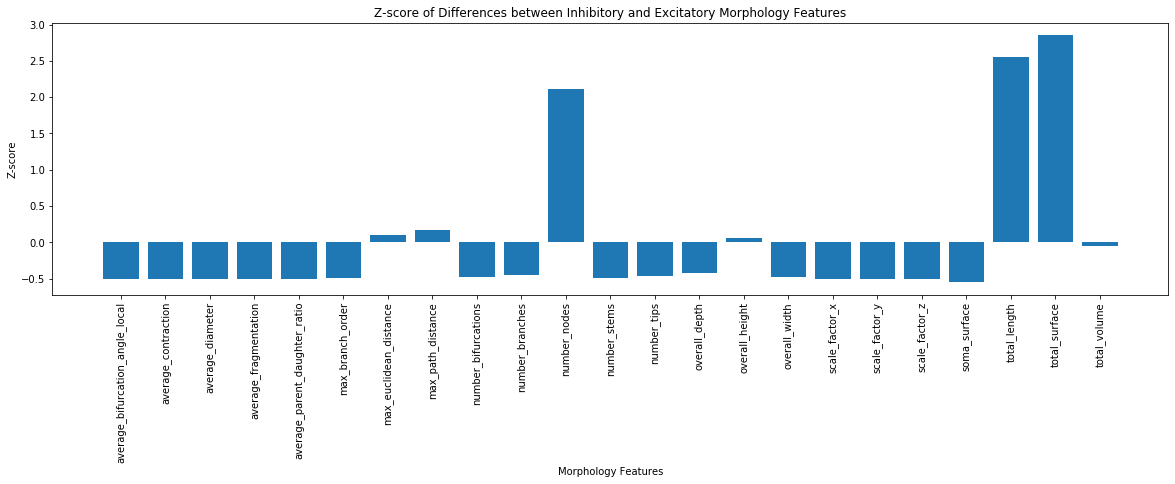

In [25]:
# Set up the figure
fig,ax = plt.subplots(figsize=(20,5))

differences = []

for i in morph_columns:
    inhib_mean = np.mean(inhib_morph_df[i])
    excit_mean = np.mean(excit_morph_df[i])
    differences.append(excit_mean - inhib_mean)

diff_zscore = stats.zscore(differences)
ax.bar(morph_columns, diff_zscore)
plt.xticks(rotation=90)

ax.set_xlabel('Morphology Features')
ax.set_ylabel('Z-score')
ax.set_title("Z-score of Differences between Inhibitory and Excitatory Morphology Features")

plt.show()

In [26]:
significant_indexes = []

for i in diff_zscore:
    if i >= 1.96:
        significant_indexes.append(i)
    elif i <= -1.96:
        significant_indexes.append(i)
        
# make a dictionary of columns and zscores
morph_zscore_dict = dict()

for i in range(len(diff_zscore)):
    morph_zscore_dict[morph_columns[i]] = [diff_zscore[i]]

morph_zscores = pd.DataFrame(morph_zscore_dict)
morph_zscores = morph_zscores[['number_nodes','total_length','total_surface']]
morph_zscores

,number_nodes,total_length,total_surface
0,2.113944,2.554072,2.852513


The zscores for number of nodes, total length, and total surface area are all significant (>= 1.96). They are all positive values, highlighting that excitatory neurons have a greater mean number of nodes, greater total length, and greater total surface area than those of inhibitory neurons.

### Spike Width Comparison via Boxplot

Text(0.5, 1.0, 'AP Half Width in Inhibitory v Excitatory Neurons')

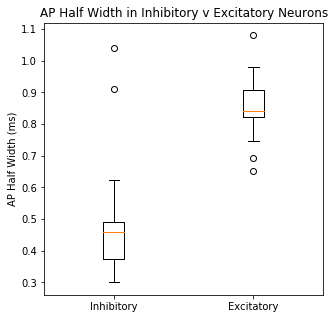

In [27]:
fig,ax = plt.subplots(figsize=(5,5))

inhib_spike_width = inhib_ephys_df['spike_width']
excit_spike_width = excit_ephys_df['spike_width']
data = [inhib_spike_width, excit_spike_width]

plt.boxplot(data)
ax.set_xticklabels(['Inhibitory', 'Excitatory'])
ax.set_ylabel('AP Half Width (ms)')
ax.set_title("AP Half Width in Inhibitory v Excitatory Neurons")

Our box plot shows that the AP half width for excitatory neurons tends to be higher than for inhibitory neurons. Though the bulk of the data points do not overlap between the two, there are some outliers that do. This could be why the zscore difference between excitatory and inhibitory AP half width is so low.

## Conclusion & Discussion

&emsp; The result of our analysis does not support Prestigio’s claim that action potential (AP) half-width is the only parameter, related to the shape of a single AP, which allows for the differentiation of excitatory and inhibitory neurons. The z-score of the difference of mean AP half-width between excitatory and inhibitory neurons was -0.071878. This z-score is below the z-score threshold of 1.96 (corresponds to α = 0.05), indicating there was no difference in the average AP half-width between excitatory and inhibitory neurons. 

&emsp; Rather, electrophysiology features that were significantly different between these two neurons were average ISI and input resistance (molm). The average interspike interval is the mean value of all interspike intervals in a sweep. The input resistance is an indication of membrane channel openness or closedness. A low resistance implies open channels, while high resistance implies closed channels [3]. The positive z-score of the ISI indicates that excitatory neurons have a greater average ISI, suggesting something inherent within inhibitory neurons that makes them more responsive to depolarization stimuli (smaller ISI). Another study reports an analogous finding that inhibitory neurons fire from smaller depolarization events than excitatory neurons [6]. The positive z-score for input resistance suggests that excitatory neurons have a greater mean input resistance, which implies that these neurons have more closed membrane channels. 

&emsp; Additionally, three morphology features were determined to be significantly different between excitatory and inhibitory neurons. These were the number of nodes, the total length, and total surface area. All z-scores were positive, indicating excitatory neurons contained a greater number of nodes, and had a greater total length and surface area. Because we defined spiny neurons as excitatory, the presence of spines could explain the increase in surface area. 

&emsp; A limitation of our study is that it relies on the assumption that spiny neurons are considered excitatory cells, while aspiny neurons are considered inhibitory. This assumption had to be made in order to categorize the cells as either excitatory or inhibitory using features within the data. However, this assumption has a basis in literature. Other peer-reviewed and published studies have also operated under the assumption that spiny neurons are excitatory and aspiny neurons are inhibitory [7]. 

&emsp; An experiment that would be beneficial to address this limitation is one that performs a similar analysis, but with data of the neurotransmitter the neuron releases. Knowing the neurotransmitter the neuron releases would theoretically allow us a accurate basis for classifying them as excitatory or inhibitory. Another interesting follow up experiment would be to perform the same analysis on human cells to see if the result is the same. If there is a high degree of similarity between human and mouse neurons, one would expect similar electrophysiological morphological features to be different between the two cell types. The results of such an experiment would provide further insight on if results generated from mouse cells are applicable to humans.

### Additional References (not previously mentioned in Background and Prior Work):

[6] Gentet et al. (2010). “Membrane Potential Dynamics of GABAergic Neurons in the Barrel Cortex of Behaving Mice.” *Neuron*, 65(3):422-435. DOI: 10.1016/j.neuron.2010.01.006. https://www.sciencedirect.com/science/article/pii/S0896627310000115

[7] Roerig et al. (2003). “Different Inhibitory Synaptic Input Patterns in Excitatory and Inhibitory Layer 4 Neurons of Ferret Visual Cortex.” *Cerebral Cortex*, 13(4):350-363. DOI: 10.1093/cercor/13.4.350 https://academic.oup.com/cercor/article/13/4/350/315705